<a href="https://colab.research.google.com/github/runnily/forward-thinking/blob/main/forward-thinking-results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forward-thinking and backpropgation 

This notebook focuses on the comparison between both learning algorthiums: Backpropgation and forward-thinking. Comprehensive experiemnts have been made to analyse the performance on both algorthiums by utilising image recingiotion task: MNIST, CIFAR, SVHN across different architectures.

## Resnets18

This section will look at how forward-thinking and backpropgation performs on the resnet architecture.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams.update({'font.size': 40})
matplotlib.rcParams.update({'lines.linewidth': 4})
matplotlib.rcParams.update({'lines.markersize': 10})

!ls
!cd forward-thinking
!ls

drive  forward-thinking  sample_data
drive  forward-thinking  sample_data


In [3]:
def forwardVsBack(
    forward_thinking_init, 
    forward_thinking_init_bn, 
    backpropgation_init, 
    backpropgation_init_bn,
    ylim):
  fig, axs = plt.subplots(ncols=3, figsize=(65,20))
  axs[0].set_title("Train Accuracy")
  axs[0].set_xlim([0,ylim])
  axs[0].set_xlabel("Time elapsed")
  axs[0].set_ylabel("Train accuracy")
  axs[0].grid()
  if isinstance(forward_thinking_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy",  marker="o", data=forward_thinking_init, ax=axs[0])
  if isinstance(forward_thinking_init_bn, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=forward_thinking_init_bn, ax=axs[0])
  if isinstance(backpropgation_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o",data=backpropgation_init, ax=axs[0])
  if isinstance(backpropgation_init_bn, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=backpropgation_init_bn, ax=axs[0])

  axs[1].set_title("Test Accuracy")
  axs[1].set_xlim([0,ylim])
  axs[1].set_xlabel("Time elapsed")
  axs[1].set_ylabel("Test accuracy")
  axs[1].grid()
  if isinstance(forward_thinking_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy",  marker="o", data=forward_thinking_init, ax=axs[1])
  if isinstance(forward_thinking_init_bn, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=forward_thinking_init_bn, ax=axs[1])
  if isinstance(backpropgation_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o",data=backpropgation_init, ax=axs[1])
  if isinstance(backpropgation_init_bn, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=backpropgation_init_bn, ax=axs[1])

  axs[2].set_title("Loss")
  axs[2].set_xlim([0,ylim])
  axs[2].set_xlabel("Time elapsed")
  axs[2].set_ylabel("Loss")
  axs[2].grid()
  if isinstance(forward_thinking_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss",  marker="o", data=forward_thinking_init, ax=axs[2])
  if isinstance(forward_thinking_init_bn, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="loss", marker="o", data=forward_thinking_init_bn, ax=axs[2])
  if isinstance(backpropgation_init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o",data=backpropgation_init, ax=axs[2])
  if isinstance(backpropgation_init_bn, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o", data=backpropgation_init_bn, ax=axs[2])
  axs[0].legend(labels=["Forward-thinking", "Forward-thinking (BN)", "Backpropagate", "Backpropagate (BN)"])

In [8]:
def forwardInit(
    init_weights, 
    without_init_weights, 
    ylim):
  fig, axs = plt.subplots(ncols=3, figsize=(55, 10))
  axs[0].set_title("Train Accuracy")
  axs[0].set_xlim([0,ylim])
  axs[0].set_xlabel("Time elapsed")
  axs[0].set_ylabel("Train accuracy")
  axs[0].grid()
  if isinstance(init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy",  marker="o", data=init_weights, ax=axs[0])
  if isinstance(without_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy",  marker="o", data=without_init_weights, ax=axs[0])
  
  axs[1].set_title("Test Accuracy")
  axs[1].set_xlim([0,ylim])
  axs[1].set_xlabel("Time elapsed")
  axs[1].set_ylabel("Test accuracy")
  axs[1].grid()
  if isinstance(init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy",  marker="o", data=init_weights, ax=axs[1])
  if isinstance(without_init_weights, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=without_init_weights, ax=axs[1])

  axs[2].set_title("Loss")
  axs[2].set_xlim([0,ylim])
  axs[2].set_xlabel("Time elapsed")
  axs[2].set_ylabel("Loss")
  axs[2].grid()
  if isinstance(init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss",  marker="o", data=init_weights, ax=axs[2])
  if isinstance(without_init_weights, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o", data=without_init_weights, ax=axs[2])
  axs[0].legend(labels=["Initialized weights", "Without initialized weights"])

In [9]:
def forwardVsBack(
    init, 
    init_batch_norm_no_learn_parameters, 
    init_batch_norm_freeze,
    init_batch_norm, 
    ylim):
  fig, axs = plt.subplots(ncols=3, figsize=(65, 20))
  axs[0].set_title("Train Accuracy")
  axs[0].set_xlabel("Time elapsed")
  axs[0].set_ylabel("Train accuracy")
  axs[0].set_xlim([0,ylim])
  axs[0].grid()
  if isinstance(init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy",  marker="o", data=init, ax=axs[0])
  if isinstance(init_batch_norm_no_learn_parameters, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=init_batch_norm_no_learn_parameters, ax=axs[0])
  if isinstance(init_batch_norm_freeze, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o",data=init_batch_norm_freeze, ax=axs[0])
  if isinstance(init_batch_norm, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="train_accuracy", marker="o", data=init_batch_norm, ax=axs[0])

  axs[1].set_title("Test Accuracy")
  axs[1].set_xlabel("Time elapsed")
  axs[1].set_ylabel("Test accuracy")
  axs[1].set_xlim([0,ylim])
  axs[1].grid()
  if isinstance(init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy",  marker="o", data=init, ax=axs[1])
  if isinstance(init_batch_norm_no_learn_parameters, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=init_batch_norm_no_learn_parameters, ax=axs[1])
  if isinstance(init_batch_norm_freeze, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o",data=init_batch_norm_freeze, ax=axs[1])
  if isinstance(init_batch_norm, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="test_accuracy", marker="o", data=init_batch_norm, ax=axs[1])

  axs[2].set_title("Loss")
  axs[2].set_xlim([0,ylim])
  axs[2].set_xlabel("Time elapsed")
  axs[2].set_ylabel("Loss")
  axs[2].grid()
  if isinstance(init, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss",  marker="o", data=init, ax=axs[2])
  if isinstance(init_batch_norm_no_learn_parameters, pd.DataFrame):
   sns.lineplot(x="time_elapsed", y="loss", marker="o", data=init_batch_norm_no_learn_parameters, ax=axs[2])
  if isinstance(init_batch_norm_freeze, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o",data=init_batch_norm_freeze, ax=axs[2])
  if isinstance(init_batch_norm, pd.DataFrame):
    sns.lineplot(x="time_elapsed", y="loss", marker="o", data=init_batch_norm, ax=axs[2])
  axs[0].legend(labels=["Wihout BN", "BN with no learning parameters", "BN frozen", "BN"])

In [10]:
resnets18_cifar_forward_thinking_init = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_ft_init.csv")
resnets18_cifar_forward_thinking = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_ft.csv")
resnets18_cifar_forward_thinking_init_bn = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_ft_init_bn.csv")
resnets18_cifar_backpropgation_init = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_bp_init.csv")
resnets18_cifar_backpropgation_init_bn = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_bp_init_bn.csv")
resnets18_cifar_forward_thinking_init_bn_freeze = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_ft_init_bn_freeze.csv")
resnets18_cifar_forward_thinking_init_bn_no_learn_params = pd.read_csv("forward-thinking/utils/recorded-accuracy/resnets18/cifar/resnet18_cifar_ft_init_bn_nolp.csv")

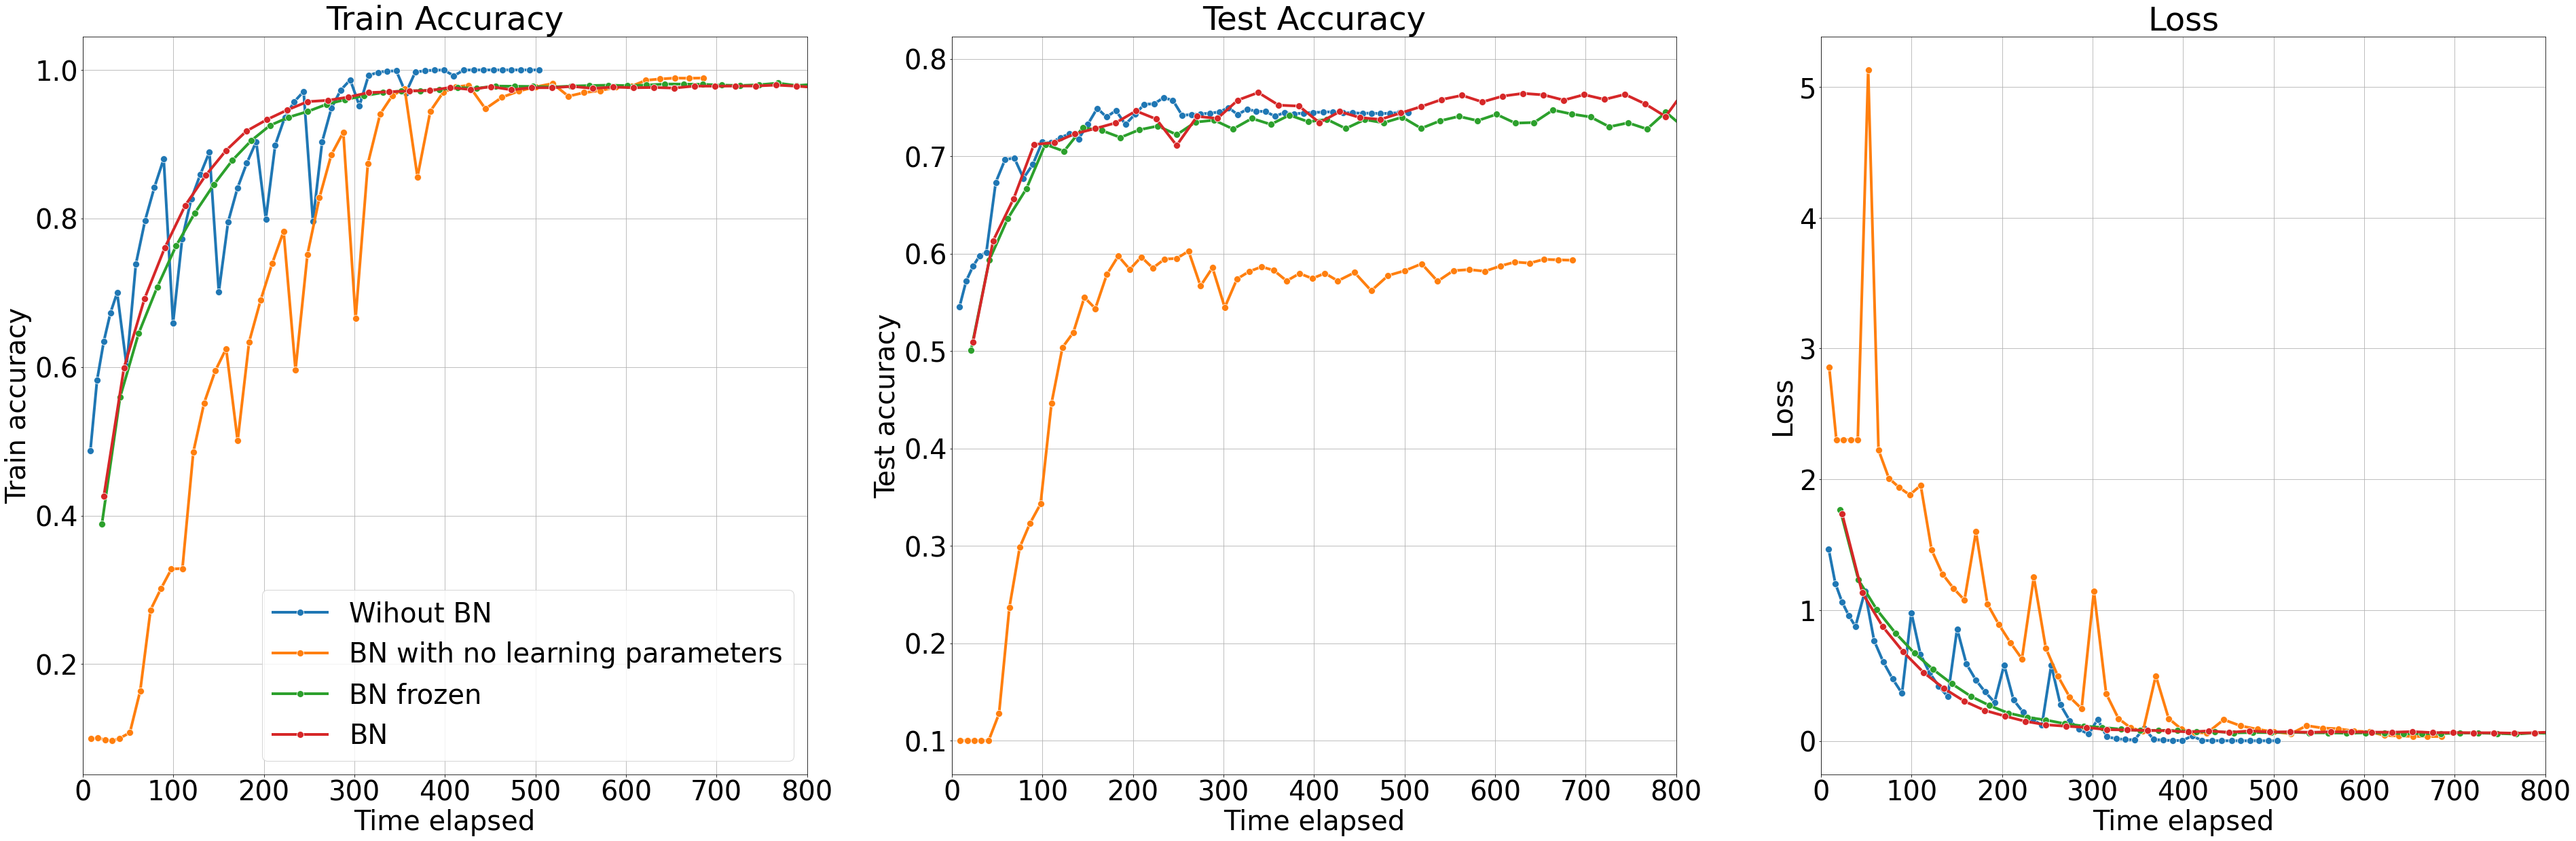

In [11]:
forwardVsBack(
    resnets18_cifar_forward_thinking_init,
    resnets18_cifar_forward_thinking_init_bn,
    resnets18_cifar_backpropgation_init,
    resnets18_cifar_backpropgation_init_bn,
    ylim=800
)

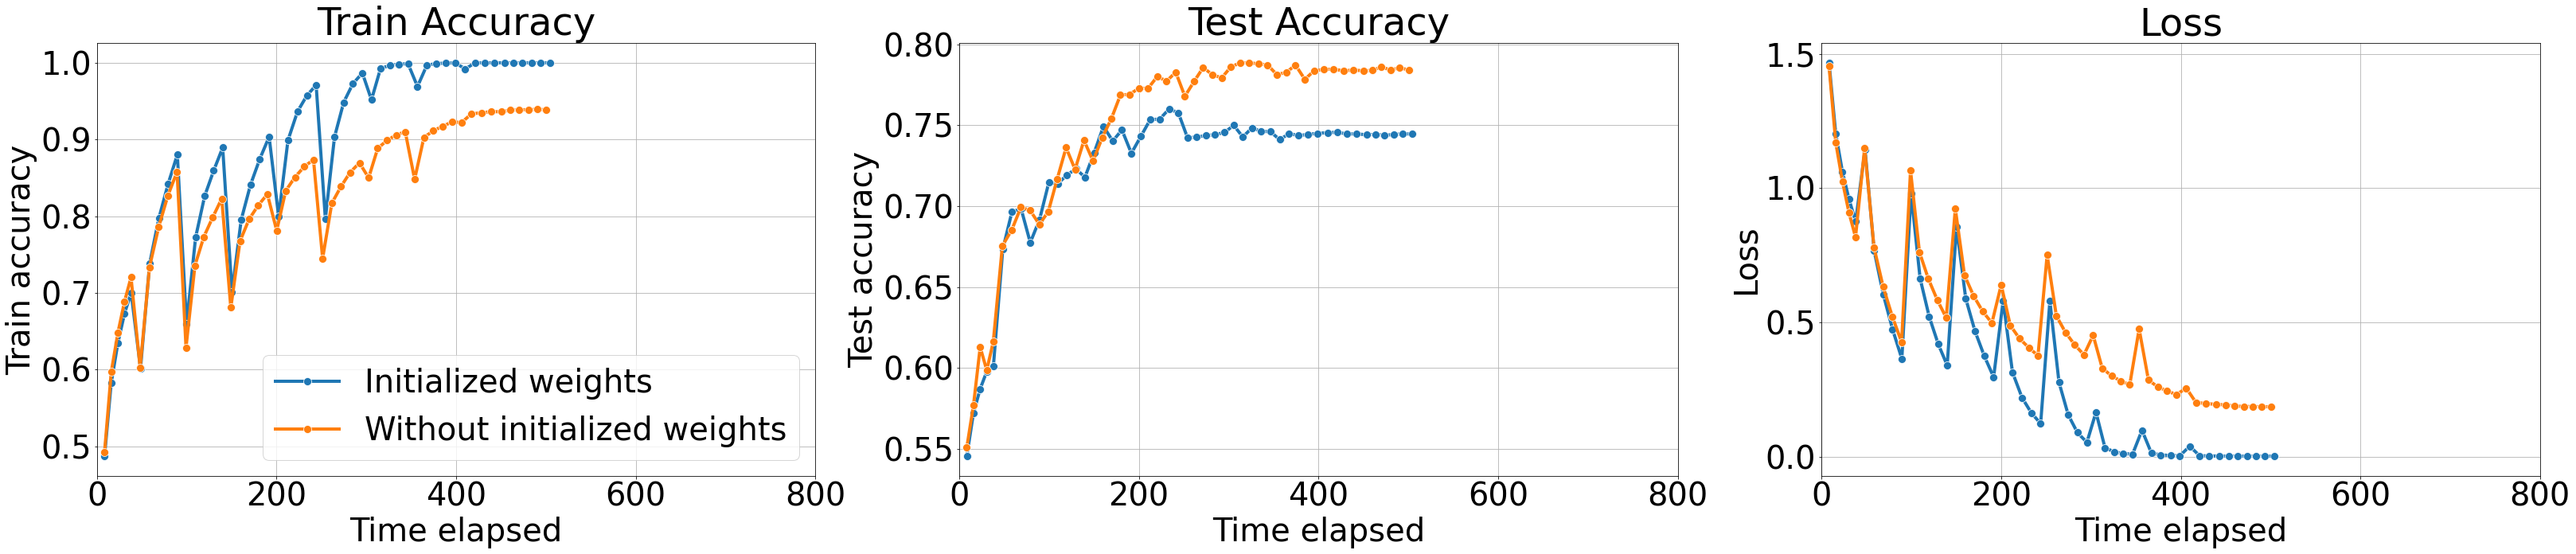

In [12]:
forwardInit(
    resnets18_cifar_forward_thinking_init,
    resnets18_cifar_forward_thinking,
    800
 )

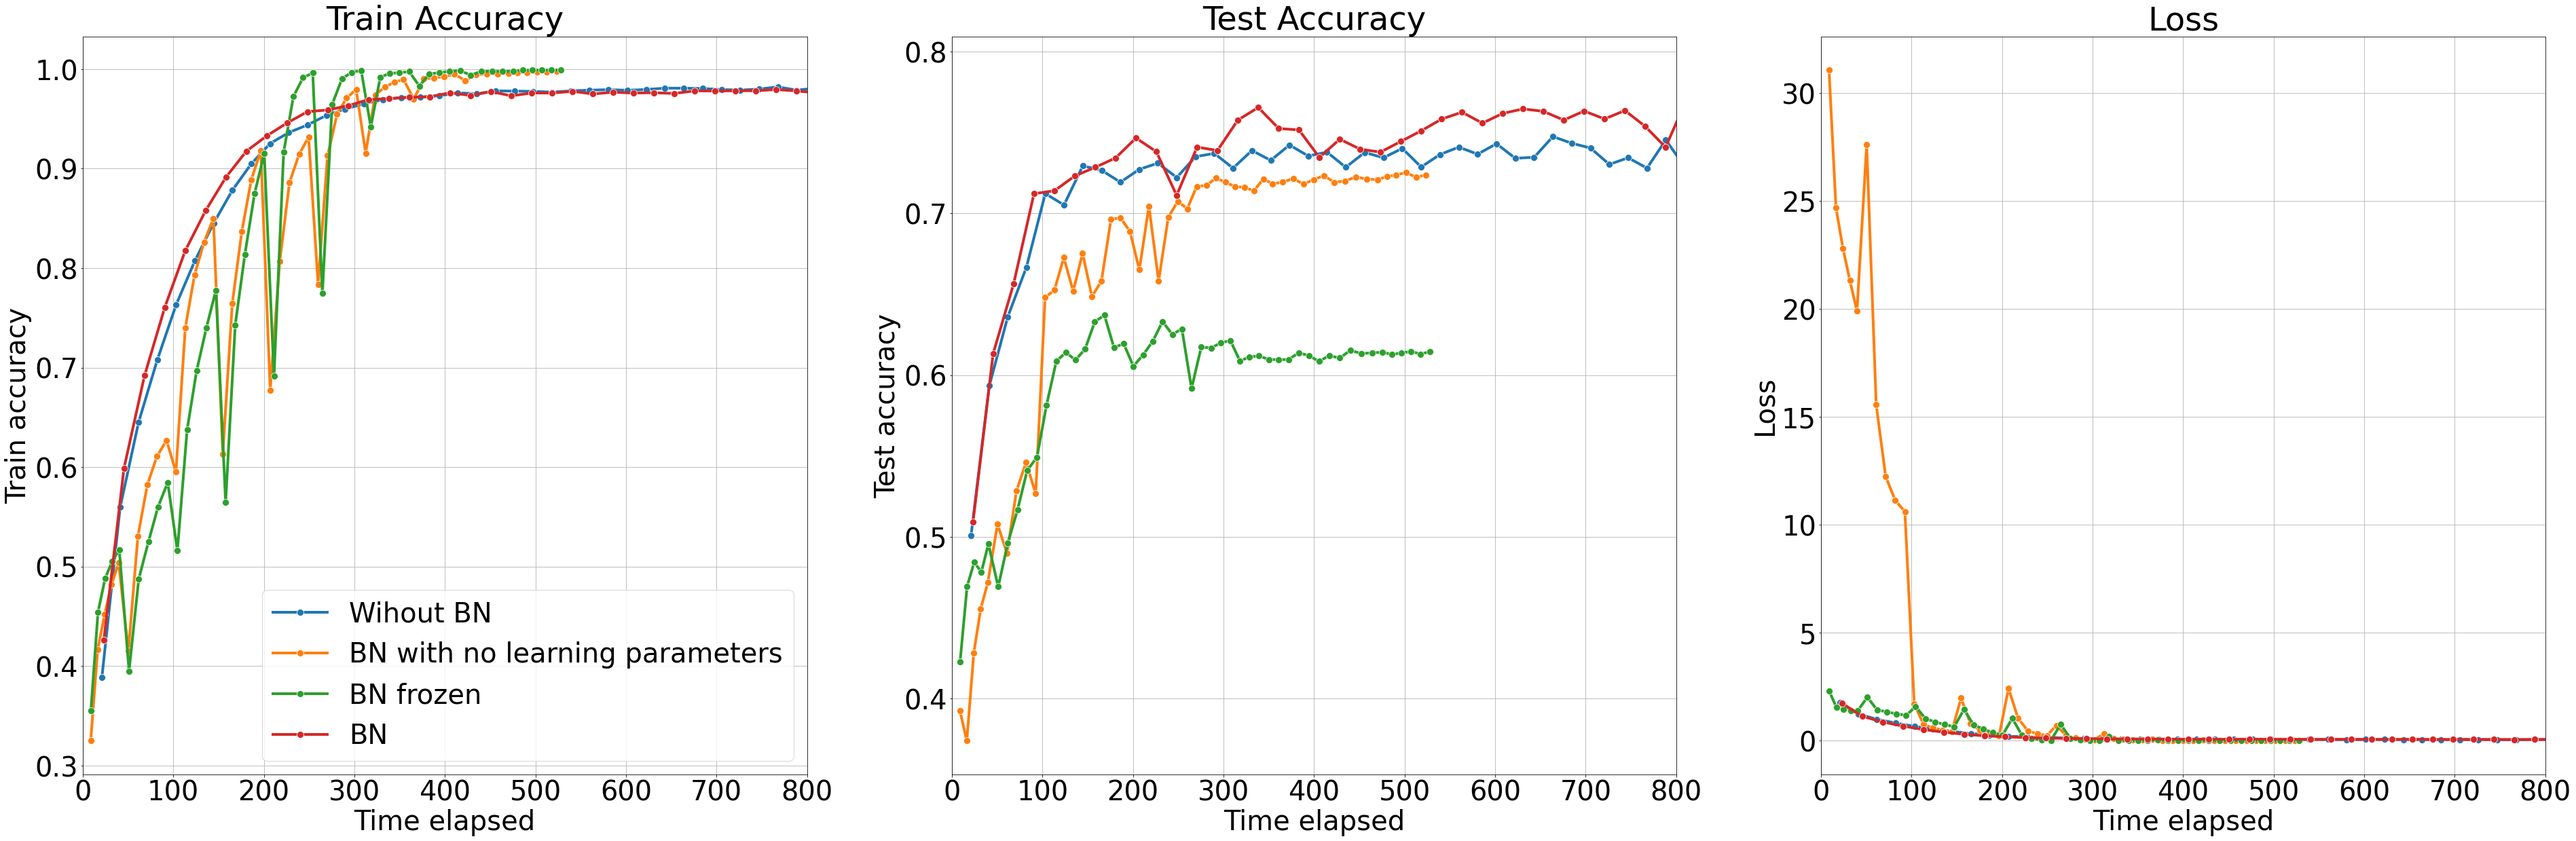

In [13]:
forwardVsBack(
    resnets18_cifar_backpropgation_init,
    resnets18_cifar_forward_thinking_init_bn_no_learn_params,
    resnets18_cifar_forward_thinking_init_bn_freeze,
    resnets18_cifar_backpropgation_init_bn,
    800
)

## VGG11

### CIFAR

In [5]:
vgg11_cifar_forward_thinking_init = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_ft_init.csv")
vgg11_cifar_forward_thinking = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_ft.csv")
vgg11_cifar_forward_thinking_init_bn = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_ft_init_bn.csv")
vgg11_cifar_backpropgation_init = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_bp_init.csv")
vgg11_cifar_backpropgation_init_bn = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_bp_init_bn.csv")
vgg11_cifar_forward_thinking_init_bn_freeze = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_ft_init_bn_freeze.csv")
vgg11_cifar_forward_thinking_init_bn_no_learn_params = pd.read_csv("forward-thinking/utils/recorded-accuracy/vgg11/cifar/vgg11_cifar_ft_init_bn_nolp.csv")

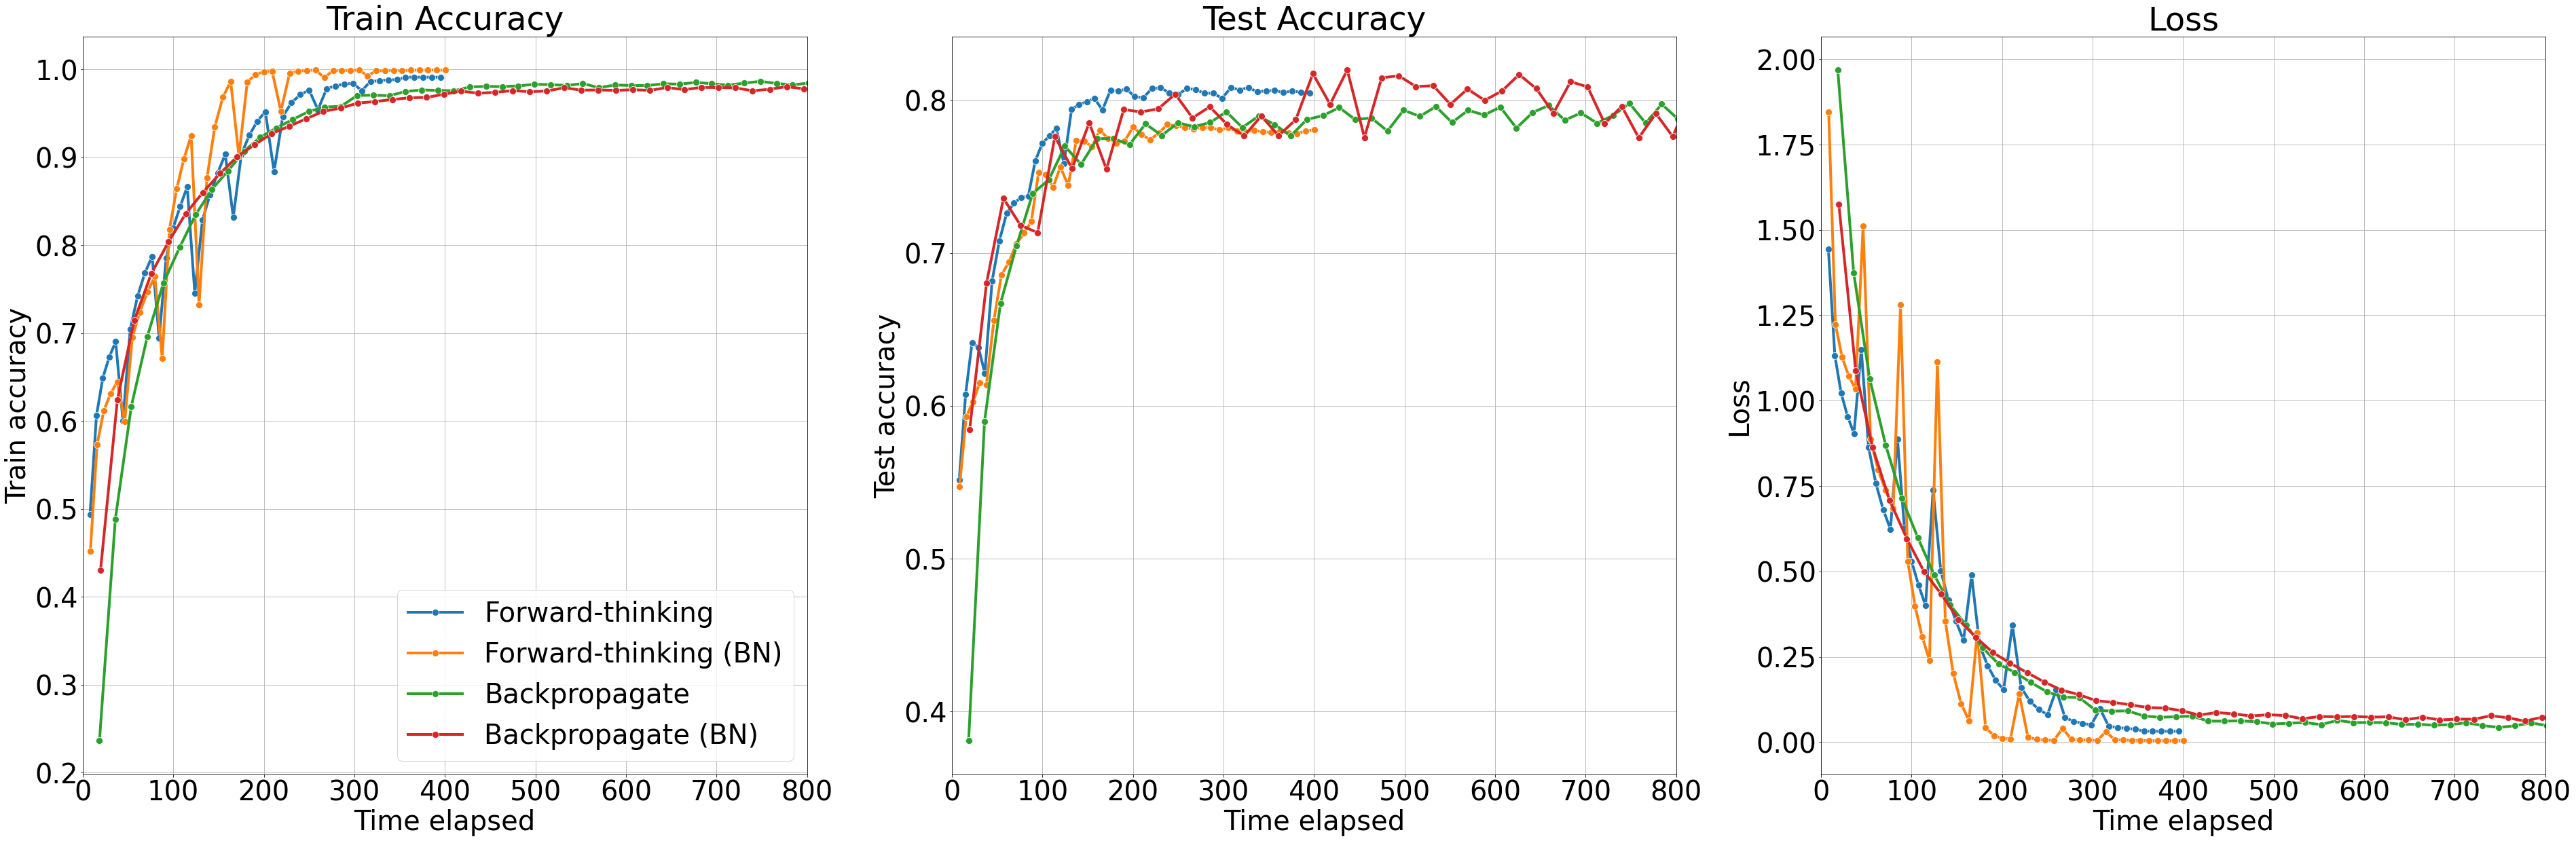

In [6]:
forwardVsBack(
    vgg11_cifar_forward_thinking_init,
    vgg11_cifar_forward_thinking_init_bn,
    vgg11_cifar_backpropgation_init,
    vgg11_cifar_backpropgation_init_bn,
    ylim=800
)

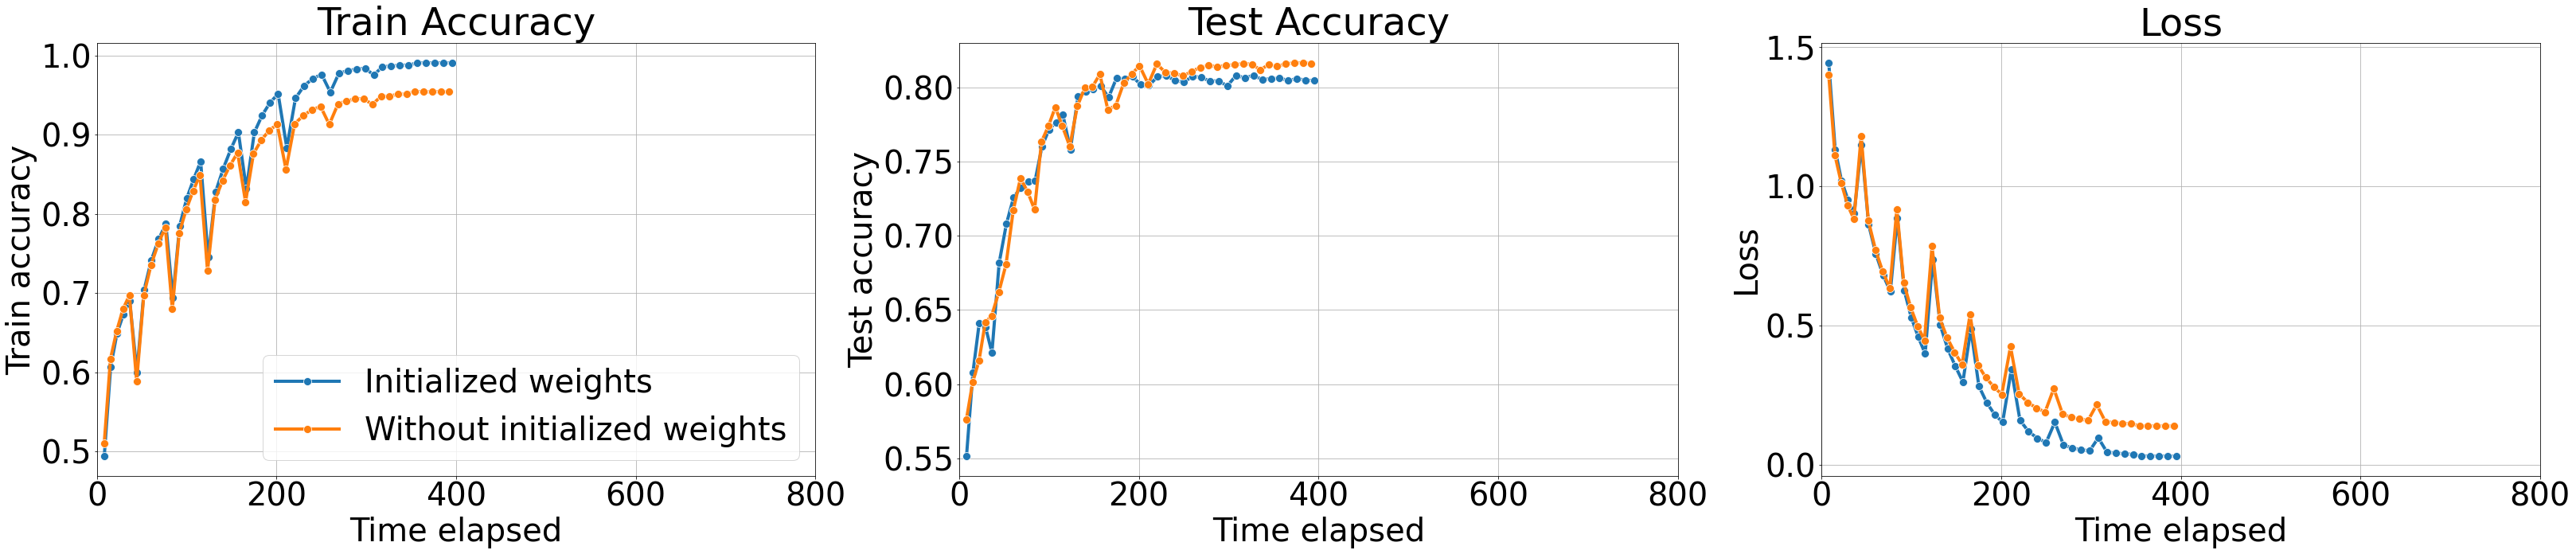

In [14]:
forwardInit(
    vgg11_cifar_forward_thinking_init,
    vgg11_cifar_forward_thinking,
    800
 )

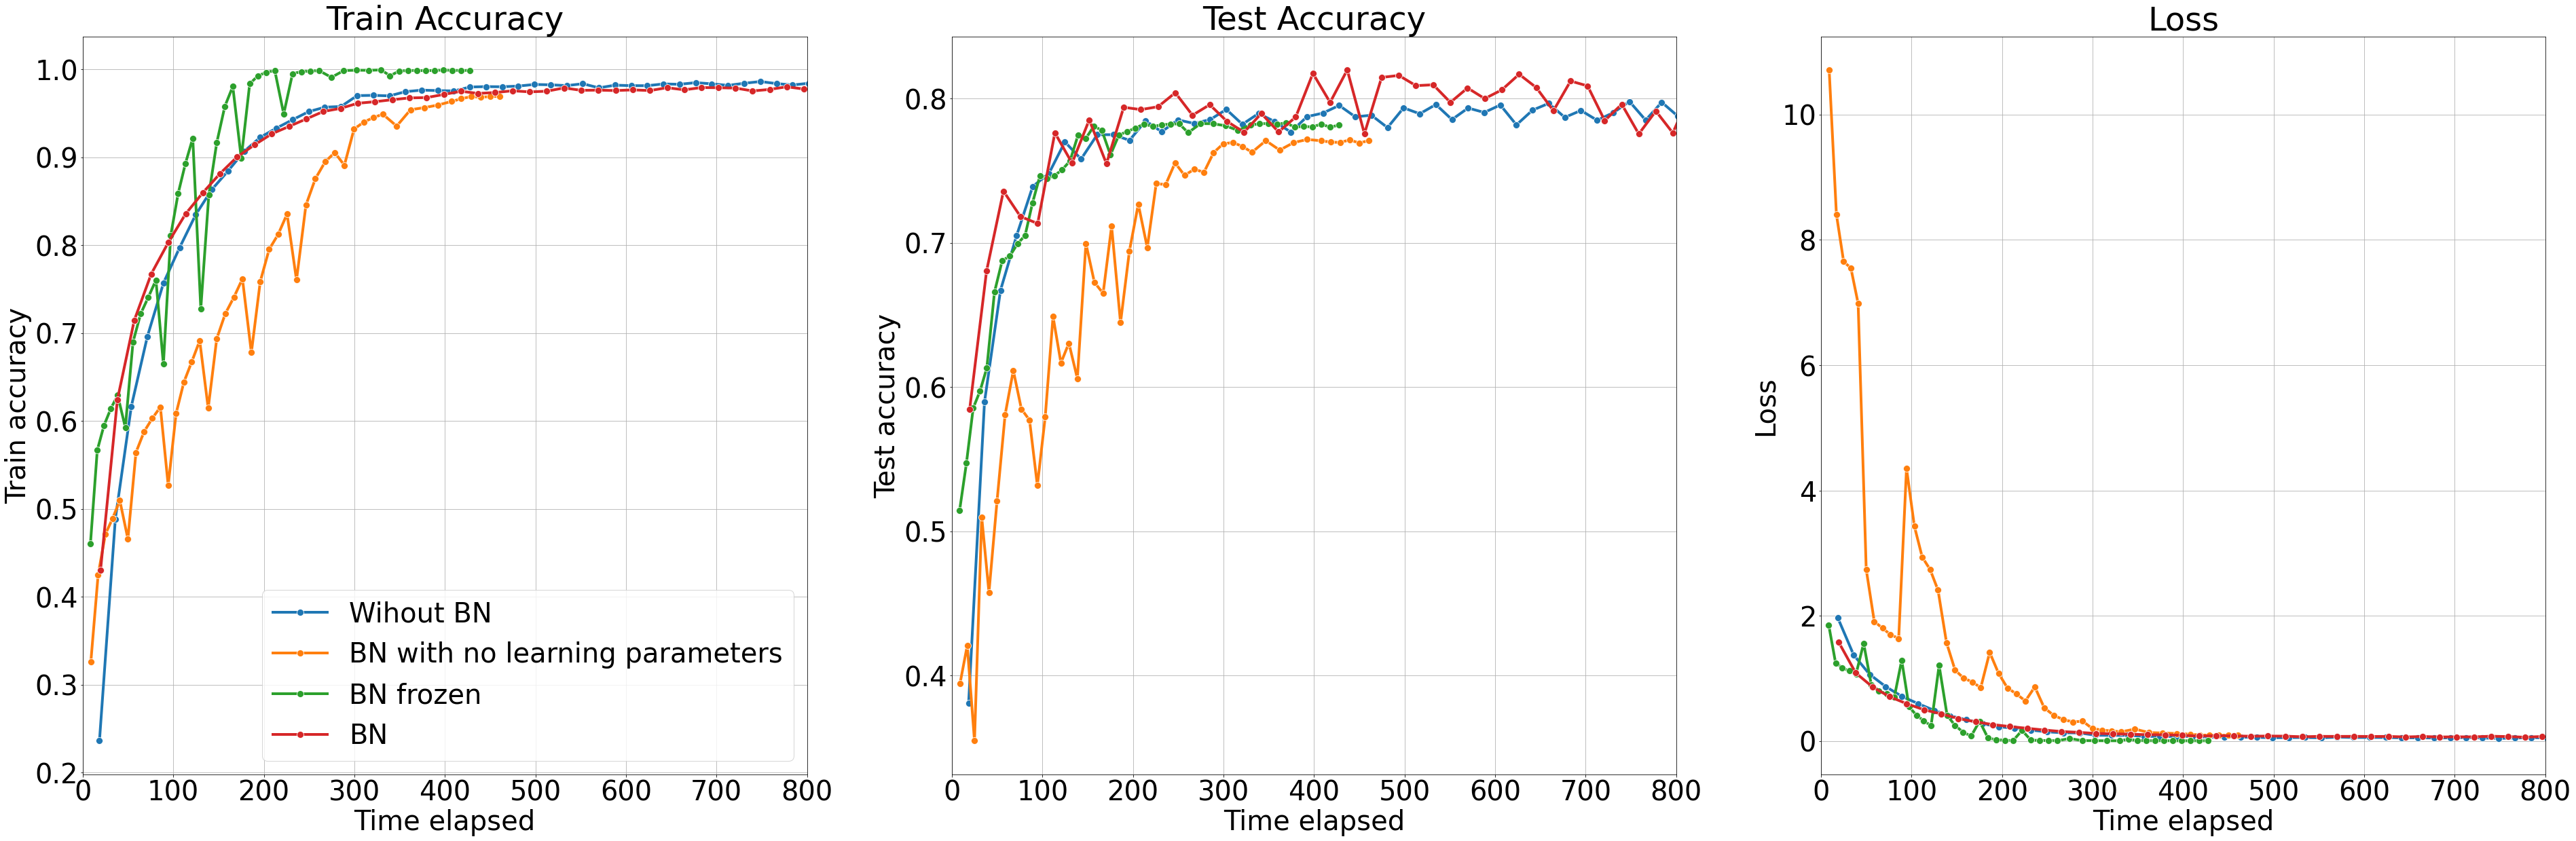

In [16]:
forwardVsBack(
    vgg11_cifar_backpropgation_init,
    vgg11_cifar_forward_thinking_init_bn_no_learn_params,
    vgg11_cifar_forward_thinking_init_bn_freeze,
    vgg11_cifar_backpropgation_init_bn,
    800
)